In [35]:
## Imports and loading csv

from bs4 import BeautifulSoup
import pandas as pd
import requests

ev_df = pd.read_csv('EV_registrations_by_county.csv')
stations_df = pd.read_csv('Maryland_charging_stations.csv')
registrations_df = pd.read_csv('Maryland_registrations_county_year.csv')

In [36]:
## Scrape county information and build dictionary mapping zip codes to counties

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
page = requests.get('https://www.zipcodestogo.com/Maryland/', headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')

leftCol = soup.find('div', {'id': 'leftCol'})
leftColTable = leftCol.find('table', {'class': 'inner_table'})
zip_information_rows = leftColTable.findAll('tr')[2:]
zip_county_dict = {list(row.children)[1].text: list(row.children)[5].text for row in zip_information_rows}
zip_county_dict

{'20601': 'Charles',
 '20602': 'Charles',
 '20603': 'Charles',
 '20604': 'Charles',
 '20606': 'Saint Marys',
 '20607': 'Prince Georges',
 '20608': 'Prince Georges',
 '20609': 'Saint Marys',
 '20610': 'Calvert',
 '20611': 'Charles',
 '20612': 'Charles',
 '20613': 'Prince Georges',
 '20615': 'Calvert',
 '20616': 'Charles',
 '20617': 'Charles',
 '20618': 'Saint Marys',
 '20619': 'Saint Marys',
 '20620': 'Saint Marys',
 '20621': 'Saint Marys',
 '20622': 'Saint Marys',
 '20623': 'Prince Georges',
 '20624': 'Saint Marys',
 '20625': 'Charles',
 '20626': 'Saint Marys',
 '20627': 'Saint Marys',
 '20628': 'Saint Marys',
 '20629': 'Calvert',
 '20630': 'Saint Marys',
 '20632': 'Charles',
 '20634': 'Saint Marys',
 '20635': 'Saint Marys',
 '20636': 'Saint Marys',
 '20637': 'Charles',
 '20639': 'Calvert',
 '20640': 'Charles',
 '20643': 'Charles',
 '20645': 'Charles',
 '20646': 'Charles',
 '20650': 'Saint Marys',
 '20653': 'Saint Marys',
 '20656': 'Saint Marys',
 '20657': 'Calvert',
 '20658': 'Charles

In [37]:
## Add county column to our stations dataframe

def get_station_county(row):
    if str(row['ZipCode']) in zip_county_dict:
        return zip_county_dict[str(row['ZipCode'])]
    return None

stations_df['county'] = stations_df.apply(lambda row: get_station_county(row), axis=1)
stations_df

,Program,Program Link,Station Name,MEA Contribution,Address,City,State,ZipCode,Location,Access,county
0,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Antwerpen Nissan - Clarksville,NaN,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,Howard
1,Electric Vehicle Supply Equipment Tax Credit P...,http://energy.maryland.gov/Transportation/evse...,Capitol Fisker,437.00,6500 Capitol Drive,Greenbelt,MD,20770,"6500 Capitol Drive\nGreenbelt, Maryland 20770\...",Public,Prince Georges
2,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Hamilton Nissan,NaN,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public,Washington
3,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Walgreens,NaN,1300 E North Ave,Baltimore,MD,21213,"1300 E North Ave\nBaltimore, Maryland 21213\n(...",Public,Baltimore City
4,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,The Frederick Motor Company,NaN,1 Waverley Dr,Frederick,MD,21702,"1 Waverley Dr\nFrederick, Maryland 21702\n(39....",Public,Frederick
...,...,...,...,...,...,...,...,...,...,...,...
274,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,JBG - Woodglen Drive,NaN,11351 Woodglen Dr,Rockville,MD,20852,"11351 Woodglen Dr\nRockville, Maryland 20852\n...",Public,Montgomery
275,E-85 Refueling Stations,http://energy.maryland.gov/Transportation/e85R...,Chevron,NaN,1395 West Patrick St,Frederick,MD,21702,"1395 West Patrick St\nFrederick, Maryland 2170...",Public,Frederick
276,Residential Electric Vehicle Supply Equipment ...,http://energy.maryland.gov/Transportation/evse/,NaN,144.22,NaN,Chevy Chase,MD,20815,"Chevy Chase, Maryland 20815\n(38.9779531230004...",NaN,Montgomery
277,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,City of Towson - Union Garage,NaN,8000 York Rd,Towson,MD,21252,"8000 York Rd\nTowson, Maryland 21252\n(39.3929...",Public,Baltimore


In [38]:
## We are only interested the number of public charging stations

stations_df = stations_df[stations_df['Access'] == 'Public']
stations_df = stations_df.drop(columns=[
                            'Program',
                            'Program Link',
                            'Station Name',
                            'MEA Contribution',
                            'Address',
                            'City',
                            'State',
                            'ZipCode',
                            'Location',
                            'Access'
])
county_num_stations = stations_df.groupby(['county']).size()
county_num_stations

county
Anne Arundel      23
Baltimore         35
Baltimore City    48
Calvert            1
Carroll            2
Cecil              1
Charles           10
Frederick          7
Harford            9
Howard            15
Montgomery        46
Prince Georges    21
Queen Annes        1
Washington         1
Wicomico           2
Worcester          1
dtype: int64

In [39]:
## Scrape population data

page = requests.get('https://www.maryland-demographics.com/counties_by_population', headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')
county_table = soup.find('table', {'class': 'ranklist'})
county_rows = county_table.findAll('tr')[1:-1]
county_populations = {}
county_names = []
for row in county_rows:
    name = row.find('a').text.replace('\'', '').replace('city/county', 'City').replace('County', '').lstrip().rstrip()
    population = row.findAll('td')[-1].text.lstrip().rstrip().replace(',', '')
    county_populations[name] = int(population)

In [40]:
## Scrape again- this time, just a list of counties; normalize list with those in county_num_stations

page = requests.get('https://msa.maryland.gov/msa/mdmanual/01glance/html/county.html', headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')

counties_anchor = soup.find('a', {'name': 'counties'})
counties_table = counties_anchor.find('table')
counties_list = [' '.join(i.text.lstrip().split(' ')).replace('\'', '')
                 .replace(' County', '') for i in counties_table.findAll('a')]
counties_list.sort()
print(counties_list)
for i in county_num_stations.index.values.tolist():
    print(i in counties_list)

['Allegany', 'Anne Arundel', 'Baltimore', 'Baltimore City', 'Calvert', 'Caroline', 'Carroll', 'Cecil', 'Charles', 'Dorchester', 'Frederick', 'Garrett', 'Harford', 'Howard', 'Kent', 'Montgomery', 'Prince Georges', 'Queen Annes', 'Somerset', 'St. Marys', 'Talbot', 'Washington', 'Wicomico', 'Worcester']
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [41]:
## Adjust ev_df county column to match our counties list where possible. We should also make sure that
## we do not lose too much data to rows with bad counties.

ev_df['County'] = ev_df.apply(lambda row: row['County'].lower().title()
                                        .replace('Saint', 'St.'),
                                        axis=1)

sum(ev_df[~ev_df['County'].isin(counties_list)]['Count'])/sum(ev_df['Count'])

0.0021684708482243055

In [42]:
## That is a small proportion, so we will drop the registrations that cannot be traced to one of our counties.
## We also are only interested in per county counts at the end of FY 2020, that is to say, in July 2020

ev_df = ev_df[ev_df['County'].isin(counties_list)]
ev_df = ev_df[ev_df['Year_Month'] == '2020/07']
county_num_vehicles = ev_df.groupby(['County']).agg('sum')
print(county_num_vehicles)
print(ev_df)

                Count
County               
Allegany           61
Anne Arundel     2711
Baltimore        2738
Baltimore City   1355
Calvert           300
Caroline           27
Carroll           523
Cecil             156
Charles           369
Dorchester         50
Frederick        1410
Garrett            20
Harford           602
Howard           3084
Kent               46
Montgomery       9374
Prince Georges   2146
Queen Annes       166
Somerset            9
St. Marys         318
Talbot            153
Washington        299
Wicomico          132
Worcester         108
   Year_Month   Fuel_Category          County  Count
0     2020/07        Electric        Allegany     29
1     2020/07        Electric    Anne Arundel   1587
2     2020/07        Electric       Baltimore   1508
3     2020/07        Electric  Baltimore City    770
4     2020/07        Electric         Calvert    140
5     2020/07        Electric        Caroline      8
6     2020/07        Electric         Carroll    292
7   

In [43]:
## We are only interested in FY 2020

registrations_df = registrations_df[registrations_df['Fiscal Year'] == 'FY 2020']
registrations_df.iloc[0][1:]

ALLEGANY            60551
ANNE ARUNDEL       586982
BALTIMORE          691845
BALTIMORE CITY     292633
CALVERT             98349
CAROLINE            38335
CARROLL            185749
CECIL               98524
CHARLES            156153
DORCHESTER          33638
FREDERICK          253839
GARRETT             33105
HARFORD            245395
HOWARD             285699
KENT                22114
MONTGOMERY         813579
PRINCE GEORGE'S    722509
QUEEN ANNE'S        58257
SOMERSET            20557
ST MARY'S          116160
TALBOT              44642
WASHINGTON         142199
WICOMICO            95023
WORCESTER           59729
Name: 10, dtype: object

In [44]:
## Assemble our combined dataframe connecting counties with the number of electric vehicles, number of charging
## stations, and number of total vehicles; also we can create a feature for the proportion of electric to total
## vehicles

def get_stations_per_capita(row):
    return row['num_charging_stations']/row['population']

def get_population(row):
    return county_populations[row['county_name']]

combined_df = pd.DataFrame(data={'county_name': [i for i in counties_list]})
county_num_stations_list = [county_num_stations[i] if i in county_num_stations.index.tolist() else 0 for i in counties_list]
combined_df = combined_df.assign(num_ev=county_num_vehicles.values).assign(num_total_vehicles=registrations_df.iloc[0][1:].values)
combined_df['num_charging_stations'] = county_num_stations_list
combined_df['ev/total'] = combined_df.apply(lambda row: row['num_ev']/row['num_total_vehicles'], axis=1)
combined_df['population'] = combined_df.apply(lambda row: get_population(row), axis=1)
combined_df['stations/capita'] = combined_df.apply(lambda row: get_stations_per_capita(row), axis=1)
combined_df

,county_name,num_ev,num_total_vehicles,num_charging_stations,ev/total,population,stations/capita
0,Allegany,61,60551,0,0.001007,71445,0.000000
1,Anne Arundel,2711,586982,23,0.004619,571275,0.000040
2,Baltimore,2738,691845,35,0.003958,828018,0.000042
3,Baltimore City,1355,292633,48,0.004630,609032,0.000079
4,Calvert,300,98349,1,0.003050,91511,0.000011
5,Caroline,27,38335,0,0.000704,33049,0.000000
6,Carroll,523,185749,2,0.002816,167699,0.000012
7,Cecil,156,98524,1,0.001583,102552,0.000010
8,Charles,369,156153,10,0.002363,159428,0.000063
9,Dorchester,50,33638,0,0.001486,32138,0.000000


In [45]:
## Scrape data on county politics based on votes casted in the 2020 presidential election, and add to our dataframe

page = requests.get('https://elections.maryland.gov/elections/2020/results/General/gen_detail_results_2020_4_BOT001-.html', headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')
soup

county_results = soup.findAll('table', {'class': 'table-stripe'})[1]
county_rows = county_results.findAll('tr')[1:-1]
county_politics = []
county_rows
for row in county_rows:
    children = row.findAll('td')
    county_votes = [int(i.text.replace(',', '')) for i in children[1:]]
    county_politics.append({
        'county_name': children[0].text.replace('\'', '').lstrip().rstrip(),
        'county_votes': county_votes,
        'county_republican': county_votes[0]/sum(county_votes),
        'county_democrat': county_votes[1]/sum(county_votes),
        'county_libertarian': county_votes[2]/sum(county_votes),
        'county_greens': county_votes[3]/sum(county_votes),
    })
    
def add_political_leaning(row, party):
    return list(filter(lambda x: x['county_name'] == row['county_name'], county_politics))[0]['county_'+party]

combined_df['republican'] = combined_df.apply(lambda row: add_political_leaning(row, 'republican'), axis=1)
combined_df['democrat'] = combined_df.apply(lambda row: add_political_leaning(row, 'democrat'), axis=1)
combined_df['libertarian'] = combined_df.apply(lambda row: add_political_leaning(row, 'libertarian'), axis=1)
combined_df['greens'] = combined_df.apply(lambda row: add_political_leaning(row, 'greens'), axis=1)

In [46]:
## Scrape data on other county demographics available from the census website, and add to our dataframe

census_scraping_urls = ['https://www.census.gov/quickfacts/fact/table/alleganycountymaryland,annearundelcountymaryland,baltimorecountymaryland,baltimorecitymarylandcounty,calvertcountymaryland,carolinecountymaryland/PST045219',
                        'https://www.census.gov/quickfacts/fact/table/carrollcountymaryland,cecilcountymaryland,charlescountymaryland,dorchestercountymaryland,frederickcountymaryland,garrettcountymaryland/PST045219',                
                        'https://www.census.gov/quickfacts/fact/table/harfordcountymaryland,howardcountymaryland,kentcountymaryland,montgomerycountymaryland,princegeorgescountymaryland,queenannescountymaryland/PST045219',
                        'https://www.census.gov/quickfacts/fact/table/somersetcountymaryland,stmaryscountymaryland,talbotcountymaryland,washingtoncountymaryland,wicomicocountymaryland,worcestercountymaryland/PST045219'
                       ]
census_county_data = {}

def get_number_from_string(string):
    if '%' in string:
        return float('.'+string.replace('.', '').replace('%', ''))
    elif '$' in string:
        return int(string.replace('$', '').replace(',', ''))
    elif string == 'Z':
        return 0
    return float(string)
    
def extract_race_statistics(soup):
    race_table = soup.find('tbody', {'data-topic': 'Race and Hispanic Origin'})
    race_rows = race_table.findAll('tr')[1:]
    for row in race_rows:
        row_name = row.find('span').text.replace(', percent', '').replace('(a)', '').replace('(b)', '').lstrip().rstrip()
        if not row_name in census_county_data:
            census_county_data[row_name] = []
        for td in row.findAll('td')[1:]:
            string_statistic = td.text.replace('', '').lstrip().rstrip()
            num_statistic = get_number_from_string(string_statistic)
            census_county_data[row_name].append(num_statistic)
            
def extract_housing_statistics(soup):
    housing_table = soup.find('tbody', {'data-topic': 'Housing'})
    housing_rows = housing_table.findAll('tr')
    housing_rows = housing_rows[2:4] + [housing_rows[6]]
    for row in housing_rows:
        row_name = row.find('span').text.lstrip().rstrip()
        if not row_name in census_county_data:
            census_county_data[row_name] = []
        for td in row.findAll('td')[1:]:
            string_statistic = td.text.replace('', '').lstrip().rstrip()
            num_statistic = get_number_from_string(string_statistic)
            census_county_data[row_name].append(num_statistic)
            
def extract_income_statistics(soup):
    income_table = soup.find('tbody', {'data-topic': 'Income & Poverty'})
    income_rows = income_table.findAll('tr')[1:-1]
    for row in income_rows:
        row_name = row.find('span').text.lstrip().rstrip()
        if not row_name in census_county_data:
            census_county_data[row_name] = []
        for td in row.findAll('td')[1:]:
            string_statistic = td.text.replace('', '').lstrip().rstrip()
            num_statistic = get_number_from_string(string_statistic)
            census_county_data[row_name].append(num_statistic)
            
def extract_family_statistics(soup):
    family_table = soup.find('tbody', {'data-topic': 'Families & Living Arrangements'})
    family_rows = [family_table.findAll('tr')[2]]
    for row in family_rows:
        row_name = row.find('span').text.lstrip().rstrip()
        if not row_name in census_county_data:
            census_county_data[row_name] = []
        for td in row.findAll('td')[1:]:
            string_statistic = td.text.replace('', '').lstrip().rstrip()
            num_statistic = get_number_from_string(string_statistic)
            census_county_data[row_name].append(num_statistic)

            
for url in census_scraping_urls:
    print(url)
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    extract_race_statistics(soup)
    extract_housing_statistics(soup)
    extract_income_statistics(soup)
    extract_family_statistics(soup)
    
for i in census_county_data.keys():
    combined_df[i] = census_county_data[i]

https://www.census.gov/quickfacts/fact/table/alleganycountymaryland,annearundelcountymaryland,baltimorecountymaryland,baltimorecitymarylandcounty,calvertcountymaryland,carolinecountymaryland/PST045219
https://www.census.gov/quickfacts/fact/table/carrollcountymaryland,cecilcountymaryland,charlescountymaryland,dorchestercountymaryland,frederickcountymaryland,garrettcountymaryland/PST045219
https://www.census.gov/quickfacts/fact/table/harfordcountymaryland,howardcountymaryland,kentcountymaryland,montgomerycountymaryland,princegeorgescountymaryland,queenannescountymaryland/PST045219
https://www.census.gov/quickfacts/fact/table/somersetcountymaryland,stmaryscountymaryland,talbotcountymaryland,washingtoncountymaryland,wicomicocountymaryland,worcestercountymaryland/PST045219


In [47]:
## Final touches to dataframe

combined_df = combined_df.drop(columns=['num_total_vehicles', 'num_ev'])
combined_df

,county_name,num_charging_stations,ev/total,population,stations/capita,republican,democrat,libertarian,greens,White alone,...,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino,"White alone, not Hispanic or Latino","Owner-occupied housing unit rate, 2015-2019","Median value of owner-occupied housing units, 2015-2019","Median gross rent, 2015-2019","Median household income (in 2019 dollars), 2015-2019","Per capita income in past 12 months (in 2019 dollars), 2015-2019","Persons per household, 2015-2019"
0,Allegany,0,0.001007,71445,0.000000,0.684540,0.300154,0.010095,0.003933,0.882,...,0.01,0.21,0.190,0.867,0.688,120700,694,45893,23607,2.31
1,Anne Arundel,23,0.004619,571275,0.000040,0.416458,0.563081,0.015157,0.004063,0.736,...,0.01,0.33,0.840,0.667,0.742,361200,1663,100798,46629,2.64
2,Baltimore,35,0.003958,828018,0.000042,0.354940,0.627349,0.011961,0.004418,0.602,...,0.01,0.26,0.580,0.558,0.661,261500,1302,76866,40105,2.58
3,Baltimore City,48,0.004630,609032,0.000079,0.107431,0.877518,0.007456,0.005665,0.318,...,0.01,0.22,0.570,0.277,0.475,160100,1073,50379,31271,2.45
4,Calvert,1,0.003050,91511,0.000011,0.519045,0.462545,0.015011,0.002601,0.810,...,0.01,0.32,0.440,0.775,0.847,358800,1520,109313,45783,2.84
5,Caroline,0,0.000704,33049,0.000000,0.653761,0.323924,0.014559,0.005722,0.810,...,0.03,0.25,0.780,0.751,0.728,202500,895,58638,29624,2.71
6,Carroll,2,0.002816,167699,0.000012,0.605766,0.366731,0.020401,0.005402,0.917,...,0.01,0.20,0.390,0.883,0.820,339600,1132,96769,42083,2.70
7,Cecil,1,0.001583,102552,0.000010,0.622744,0.355573,0.014935,0.004844,0.883,...,0.01,0.25,0.470,0.846,0.730,242700,1126,76887,34810,2.73
8,Charles,10,0.002363,159428,0.000063,0.287201,0.698056,0.008634,0.004581,0.416,...,0.01,0.40,0.630,0.372,0.769,313300,1682,100003,41717,2.78
9,Dorchester,0,0.001486,32138,0.000000,0.550019,0.430338,0.010920,0.006088,0.667,...,0.01,0.24,0.610,0.623,0.680,183300,879,52917,30293,2.39


Correlation of stations/capita with proportion of electric to total vehicles:
0.5652105845413133
Correlation of republican with proportion of electric to total vehicles:
-0.6366921091890837
Correlation of democrat with proportion of electric to total vehicles:
0.6326547436742969
Correlation of libertarian with proportion of electric to total vehicles:
-0.06598859944382009
Correlation of greens with proportion of electric to total vehicles:
0.07475303849936991
Correlation of White alone with proportion of electric to total vehicles:
-0.307057089413994
Correlation of Black or African American alone with proportion of electric to total vehicles:
-0.17687683192358455
Correlation of American Indian and Alaska Native alone with proportion of electric to total vehicles:
0.12108588096201604
Correlation of Asian alone with proportion of electric to total vehicles:
0.21795718714318033
Correlation of Native Hawaiian and Other Pacific Islander alone with proportion of electric to total vehicles:
-

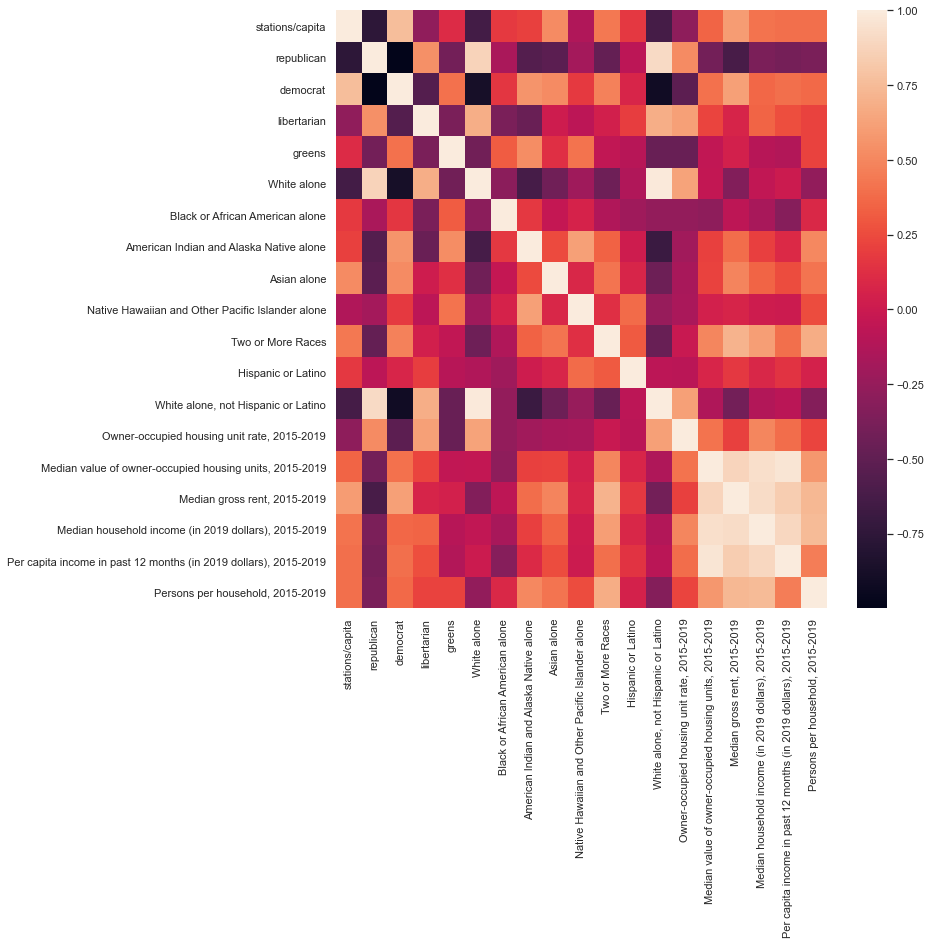

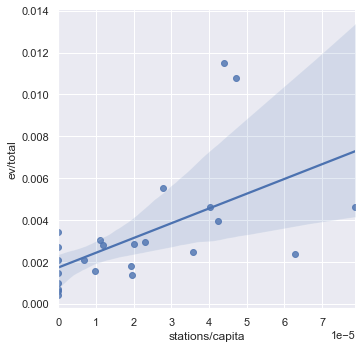

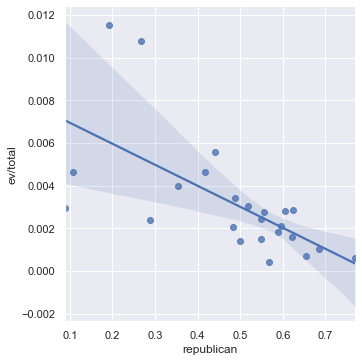

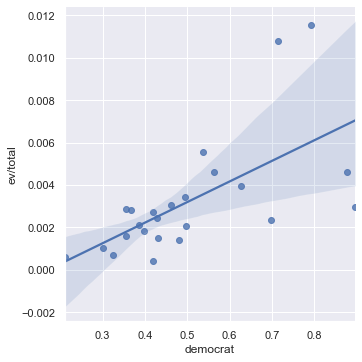

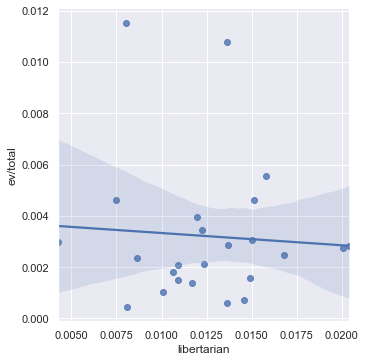

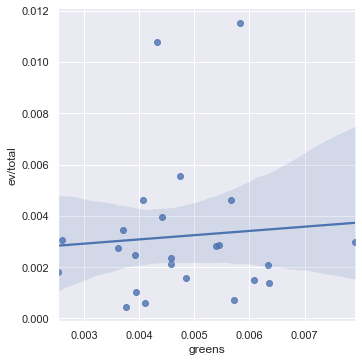

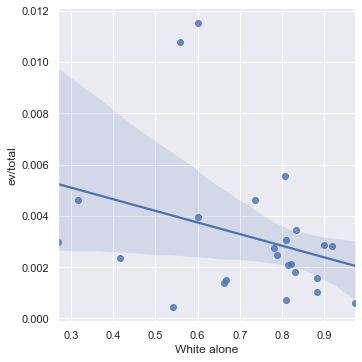

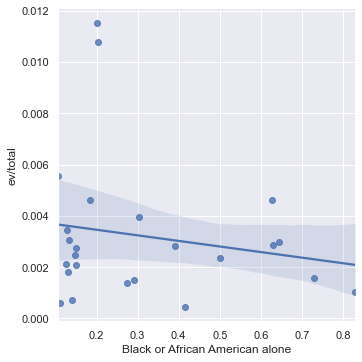

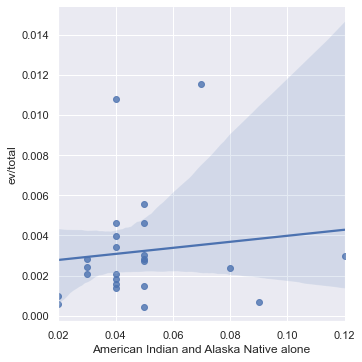

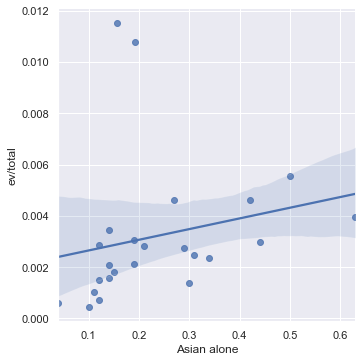

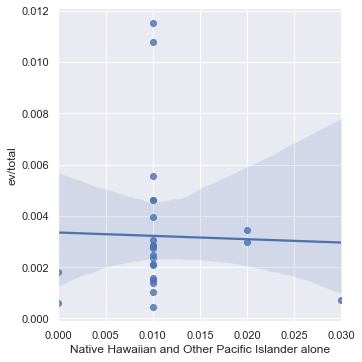

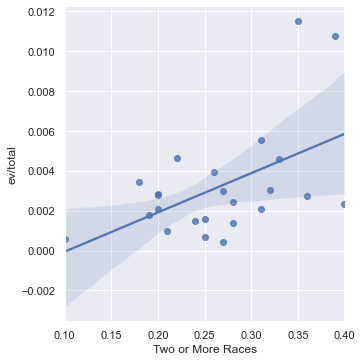

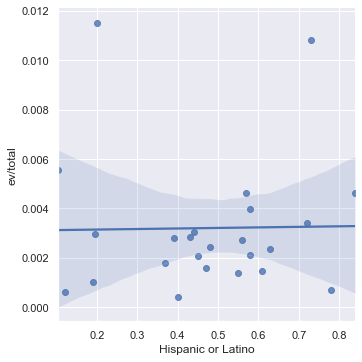

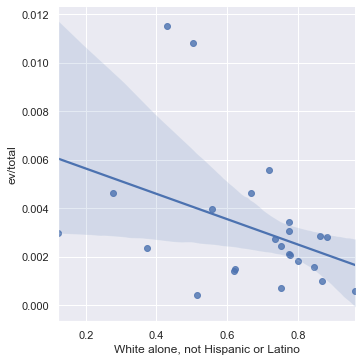

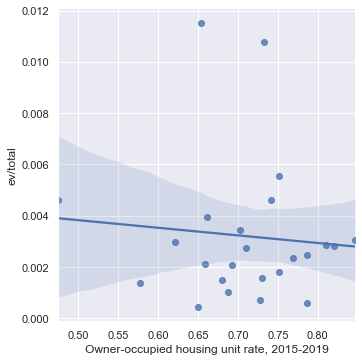

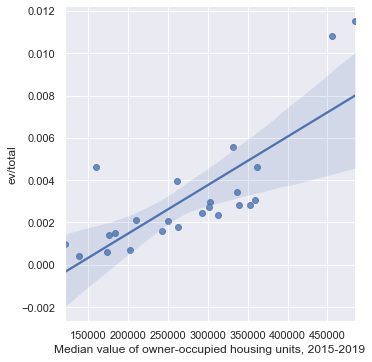

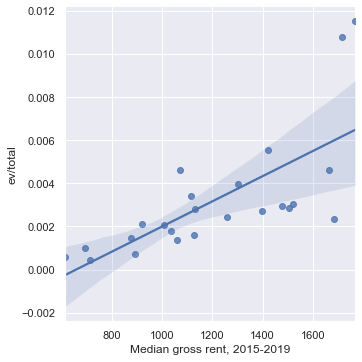

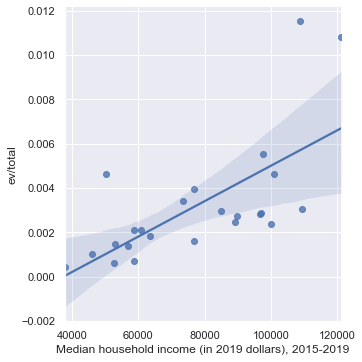

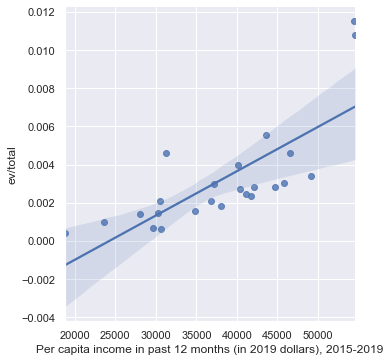

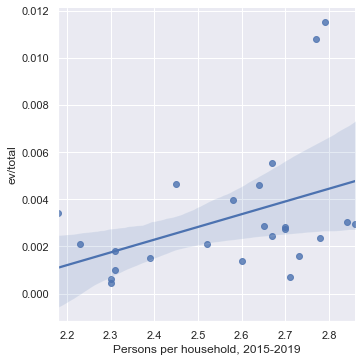

In [49]:
## Data correlation summaries and visualizations

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
sns.set(style="darkgrid")

ignore_correlation_columns = ['county_name', 'num_charging_stations', 'ev/total', 'population']

plt.figure(figsize=(11, 11))
ax = sns.heatmap(combined_df.drop(columns=ignore_correlation_columns).corr())


for i in list(combined_df.columns):
    if i not in ignore_correlation_columns:
        print('Correlation of '+i+' with proportion of electric to total vehicles:')
        print(combined_df[i].corr(combined_df['ev/total']))
        sns.lmplot(data=combined_df, x=i, y="ev/total")